# Data Exploration and Analysis

This notebook explores the diabetes dataset for classification tasks.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
print('Libraries loaded!')

Libraries loaded!


## Load Dataset

In [24]:
try:
    df = pd.read_csv('../data/raw/diabetes_dataset.csv')
except FileNotFoundError:
    print('Dataset not found. Creating sample data for demonstration...')
    np.random.seed(42)
    n = 768
    df = pd.DataFrame({
        'Pregnancies': np.random.randint(0, 18, n),
        'Glucose': np.random.normal(120, 30, n).clip(0, 200),
        'BloodPressure': np.random.normal(70, 20, n).clip(0, 130),
        'SkinThickness': np.random.normal(20, 15, n).clip(0, 100),
        'Insulin': np.random.normal(80, 100, n).clip(0, 850),
        'BMI': np.random.normal(32, 8, n).clip(0, 70),
        'DiabetesPedigreeFunction': np.random.uniform(0.08, 2.5, n),
        'Age': np.random.randint(21, 82, n),
        'Outcome': np.random.choice([0, 1], n, p=[0.65, 0.35])
    })
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [26]:
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


## Visualizations

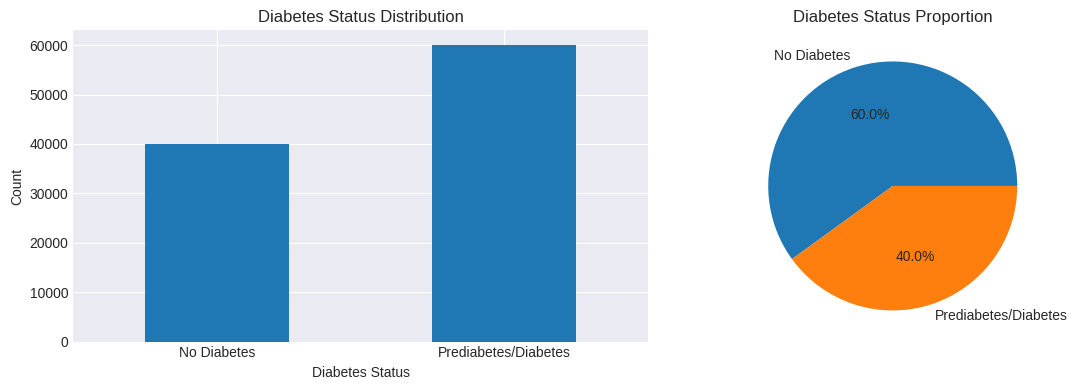

In [27]:
# Target distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
df['diagnosed_diabetes'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Diabetes Status Distribution')
ax[0].set_xlabel('Diabetes Status')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['No Diabetes', 'Prediabetes/Diabetes'], rotation=0)

# Pie chart
df['diagnosed_diabetes'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', labels=['No Diabetes', 'Prediabetes/Diabetes'])
ax[1].set_title('Diabetes Status Proportion')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

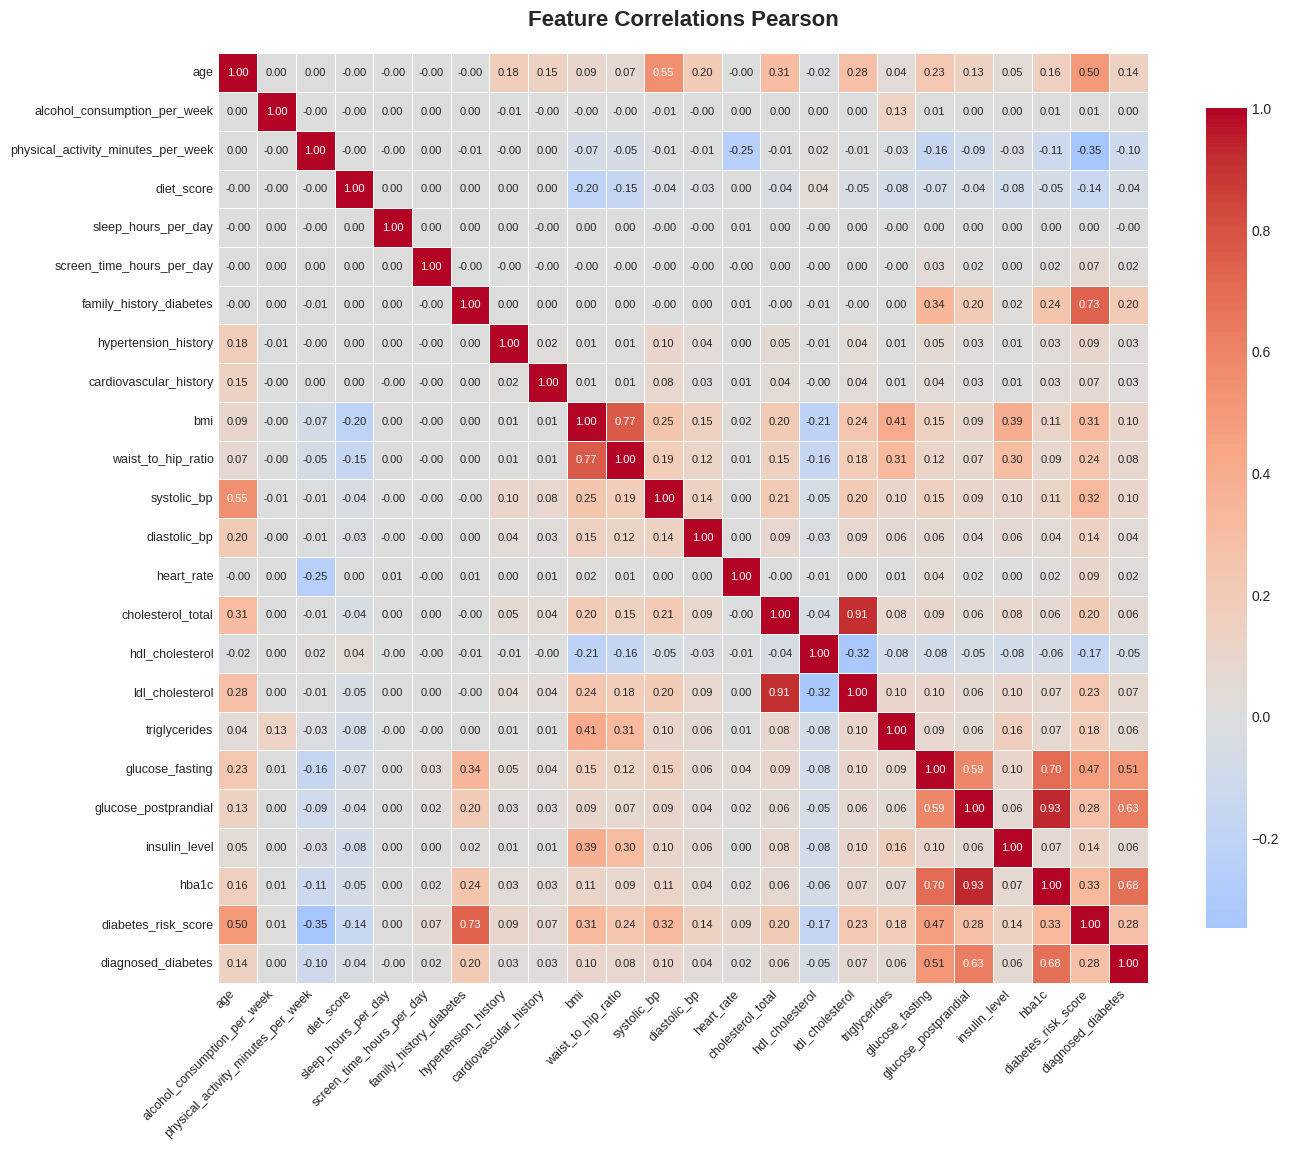

In [28]:
# Correlation matrix with improved readability for many features
plt.figure(figsize=(14, 12))

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plot with smaller annotations for readability
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, 
            cbar_kws={"shrink": 0.8}, annot_kws={"fontsize": 8})
plt.title('Feature Correlations Pearson', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

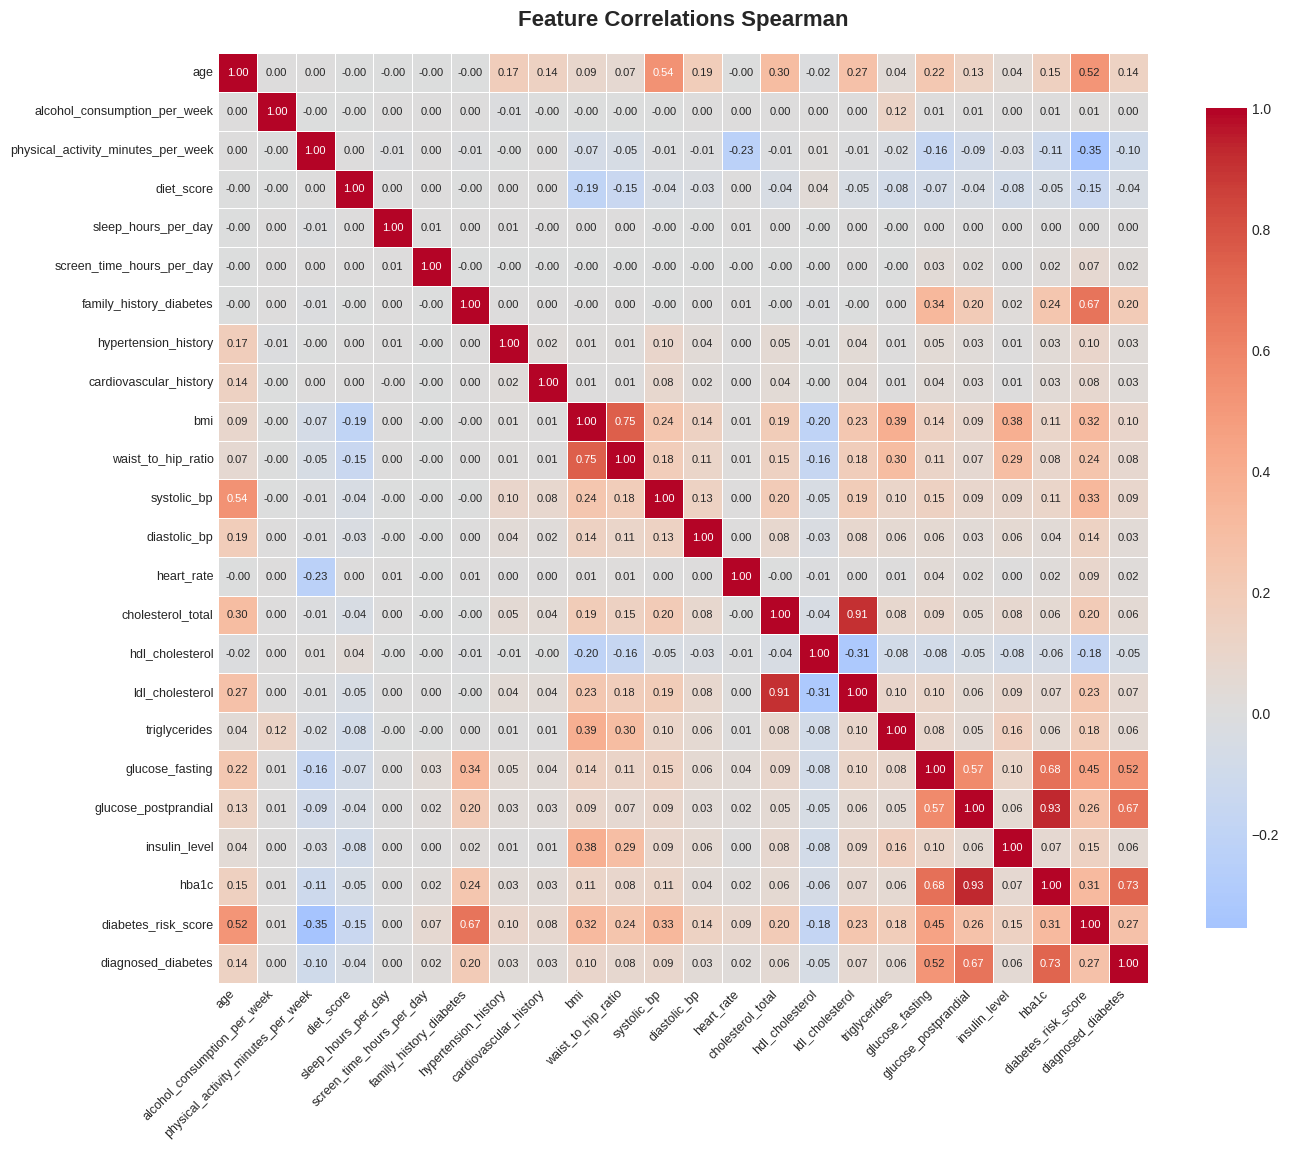

In [29]:
# Correlation matrix using Spearman
plt.figure(figsize=(14, 12))

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Spearman correlation
correlation_matrix = numeric_df.corr(method='spearman')

# Heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"fontsize": 8}
)

plt.title('Feature Correlations Spearman', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

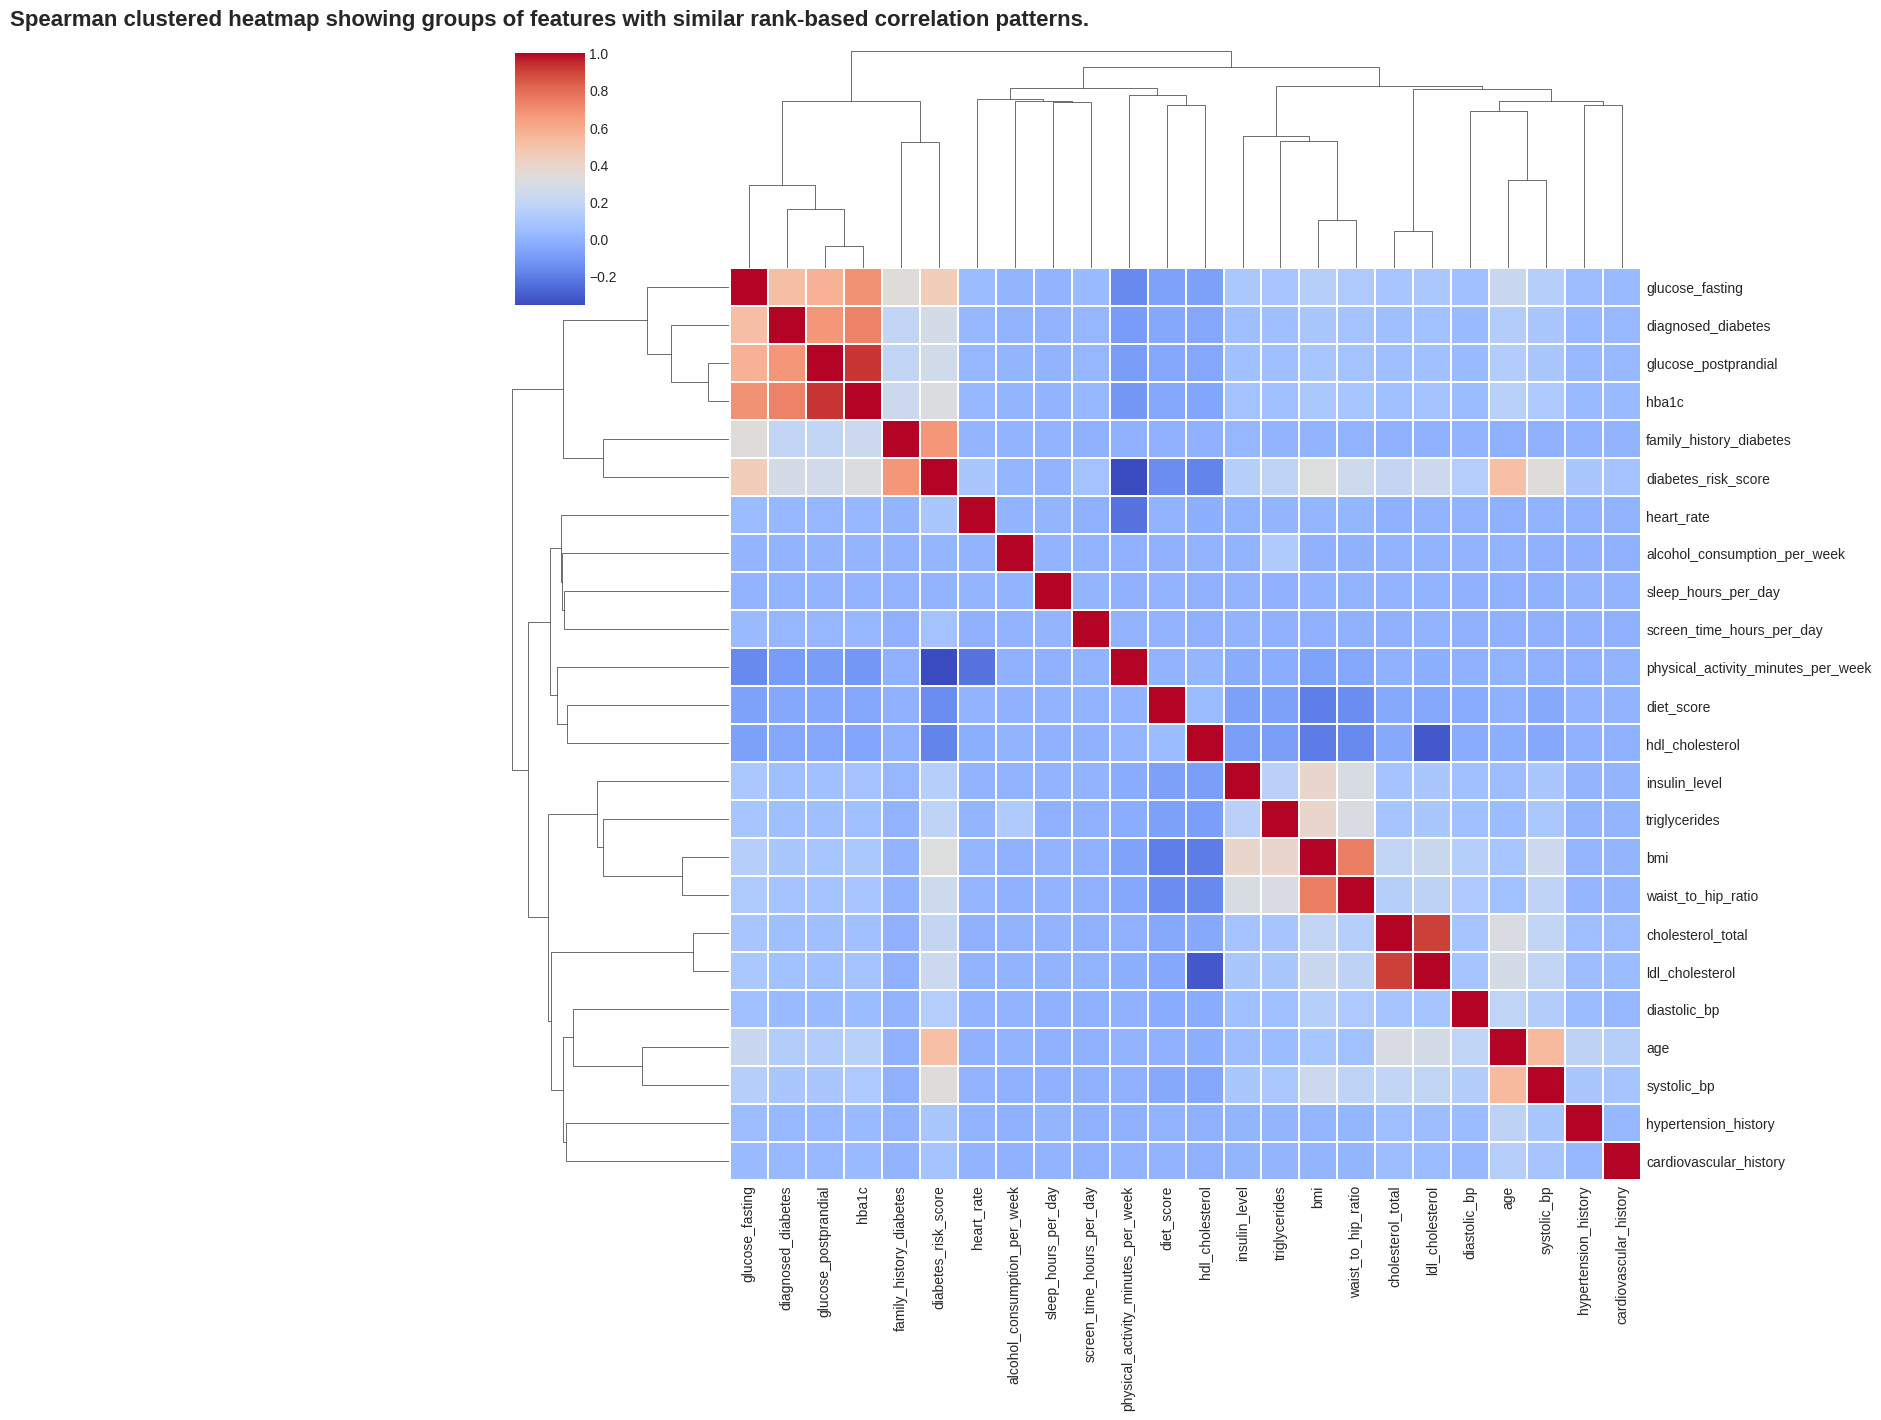

In [30]:
# Spearman clustered correlation map
# This visualization groups features based on their rank-based correlation patterns.
# It helps identify clusters of variables that behave similarly, revealing redundant features,
# structural relationships in the dataset, and guiding feature selection for modeling.

spearman_corr = df.select_dtypes(include=[np.number]).corr(method='spearman')

sns.clustermap(
    spearman_corr,
    cmap="coolwarm",
    figsize=(14, 14),
    linewidths=0.2,
    annot=False
)
plt.title('Spearman clustered heatmap showing groups of features with similar rank-based correlation patterns.', fontsize=16, fontweight='bold', pad=20)
plt.show()


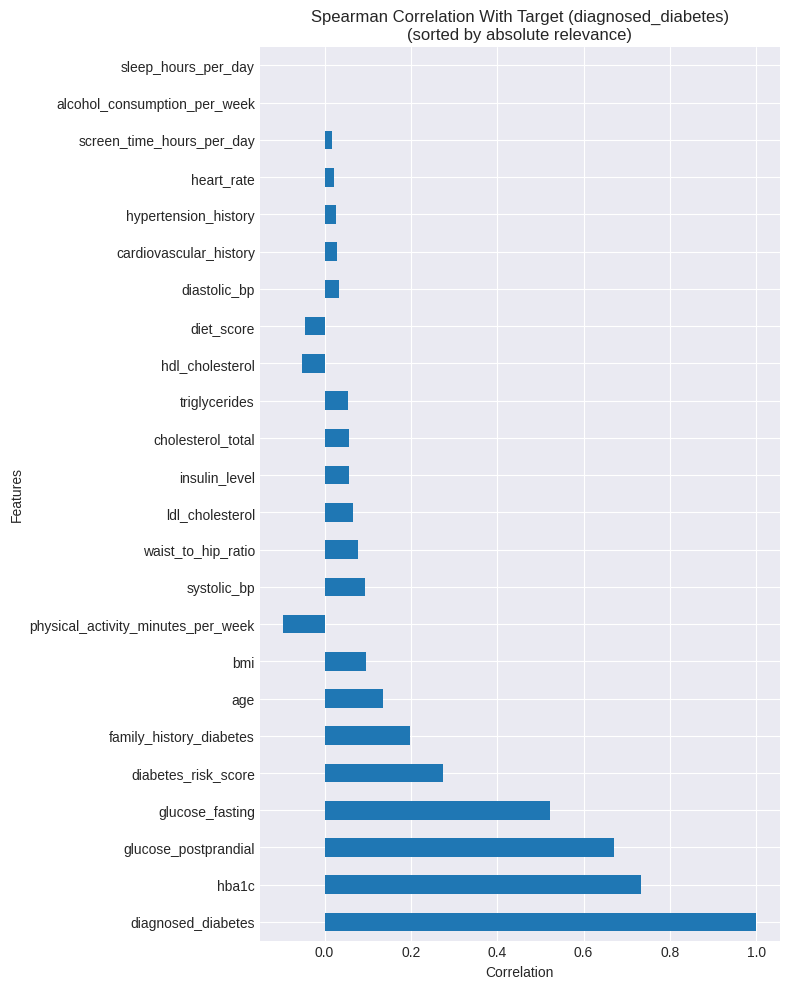

In [35]:
# ------------------------------------------------------------
# Spearman Target Correlation Analysis (Ranked by Absolute Value)
# ------------------------------------------------------------
# This code:
# 1. Computes Spearman correlation with the target
# 2. Sorts features by absolute correlation (most relevant first)
# 3. Plots a bar chart keeping the sign, since direction matters
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def compute_spearman_target_corr(df, target_column):
    """
    Computes Spearman correlation between all numeric features and the target.
    Returns a pandas Series sorted by absolute correlation (descending).
    """
    numeric_df = df.select_dtypes(include=[float, int])
    corr_series = numeric_df.corr(method='spearman')[target_column]

    # sort by absolute correlation (strongest relationships first)
    corr_series = corr_series.reindex(corr_series.abs().sort_values(ascending=False).index)

    return corr_series


def plot_spearman_target_corr(df, target_column):
    """
    Plots Spearman correlations with the target, ordered by absolute value.
    This highlights the most relevant features regardless of sign.
    """
    target_corr = compute_spearman_target_corr(df, target_column)

    plt.figure(figsize=(8, 10))
    target_corr.plot(kind='barh')

    plt.title(f"Spearman Correlation With Target ({target_column})\n(sorted by absolute relevance)")
    plt.xlabel("Correlation")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------
# EXECUTE FOR YOUR DATASET
# ------------------------------------------------------------
plot_spearman_target_corr(df, 'diagnosed_diabetes')


